<a href="https://colab.research.google.com/github/jaimishra9/eip4/blob/master/1st_DNN_jmishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


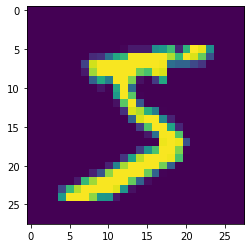

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
print (X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, data_format=None))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        36896     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        1056      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 10)        330       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/20





60000/60000 [==============================] - 37s 614us/step - loss: 0.1449 - acc: 0.9550
Epoch 2/20
60000/60000 [==============================] - 29s 479us/step - loss: 0.0511 - acc: 0.9842
Epoch 3/20
60000/60000 [==============================] - 29s 487us/step - loss: 0.0377 - acc: 0.9882
Epoch 4/20
60000/60000 [==============================] - 29s 482us/step - loss: 0.0301 - acc: 0.9903
Epoch 5/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.0256 - acc: 0.9919
Epoch 6/20
60000/60000 [==============================] - 29s 478us/step - loss: 0.0201 - acc: 0.9935
Epoch 7/20
60000/60000 [==============================] - 29s 483us/step - loss: 0.0175 - acc: 0.9944
Epoch 8/20
60000/60000 [==============================] - 30s 495us/step - loss: 0.0154 - acc: 0.9947
Epoch 9/20
60000/60000 [==============================] - 31s 512us/step - loss: 0.0127 - acc: 0.9956
Epoch 10/20
60000/60000 [==============================] - 33s 551us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.05137846188668286, 0.9901]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.7353710e-20 1.2148269e-25 9.1650010e-17 1.3573208e-20 4.0019949e-34
  3.7303055e-30 0.0000000e+00 1.0000000e+00 9.4530415e-25 2.0533502e-19]
 [1.5410787e-17 2.8824548e-17 1.0000000e+00 1.1481761e-25 1.7479504e-17
  1.1307292e-32 1.4006354e-14 7.1296370e-22 7.1185018e-20 6.7398405e-28]
 [1.4091581e-12 1.0000000e+00 4.8655568e-09 2.3957670e-14 4.5670415e-11
  6.9744739e-15 4.6840908e-12 7.7866652e-10 3.2876743e-10 6.1971268e-14]
 [1.0000000e+00 3.0707302e-27 1.6106647e-14 1.4772064e-21 5.5703719e-20
  9.6814854e-20 1.2019082e-11 1.5810087e-19 3.7052371e-12 5.3995883e-12]
 [3.5519771e-25 3.8471818e-20 2.9534311e-19 3.3085485e-24 1.0000000e+00
  6.6300930e-26 1.2184416e-19 1.9005160e-20 1.5709719e-15 2.5354165e-13]
 [1.3013342e-14 1.0000000e+00 1.1124769e-10 3.7789680e-18 5.5826448e-13
  2.5492435e-19 1.3003496e-17 1.0124041e-10 3.9482798e-14 5.1203704e-18]
 [1.7370801e-23 4.0711498e-10 3.3503280e-12 3.4546413e-20 9.9999797e-01
  9.4461131e-15 1.7142380e-23 1.4205288e-17 1.9699978e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

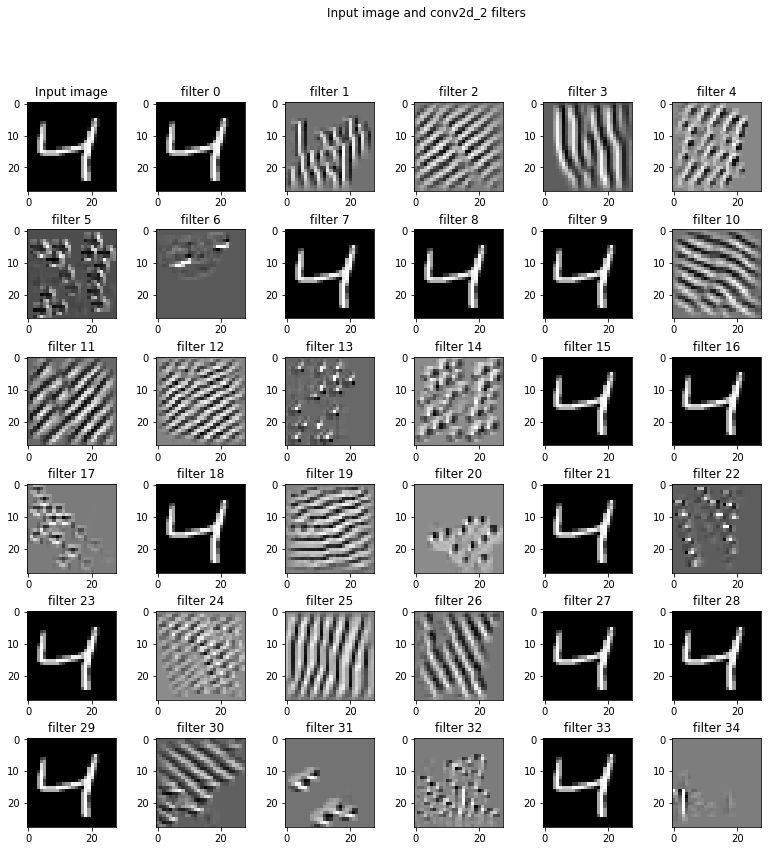

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()